In [2]:
import os
import numpy as np
import matplotlib

In [5]:
dpm_ori_path = "./experiments/dpm/eval/"
dpm_fewer_path = "./experiments/dpm_fewer/eval/"
dpm_ori = []
dpm_fewer = []
for i in range(5,105,5):
    a = np.load(dpm_ori_path+"report_{}.npz".format(i))
    dpm_ori.append(a['fid'])
    b = np.load(dpm_fewer_path+"report_{}.npz".format(i))
    dpm_fewer.append(b['fid'])
dpm_ori = np.array(dpm_ori)
dpm_fewer = np.array(dpm_fewer)
print(dpm_ori)
print(dpm_fewer)

[12.060902   7.906168   6.5395794  6.041954   5.691998   5.420396
  5.3846006  5.359099   5.4144063  5.3806787  5.298142   5.346576
  5.427935   5.3998866  5.4178224  5.4899807  5.4855156  5.432545
  5.4168158  5.516661 ]
[14.441078   9.79698    7.877878   7.1342683  6.6386886  6.541377
  6.3623405  6.366857   6.270207   6.3023496  6.2433558  6.272289
  6.242376   6.4643197  6.384663   6.3415174  6.334691   6.413345
  6.329011   6.4362717]


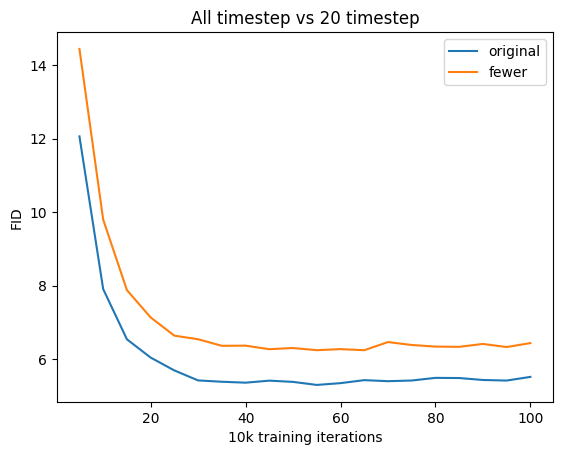

In [10]:
import matplotlib.pyplot as plt
y = list(range(5,105,5))
plt.plot(y,dpm_ori,label='original')
plt.plot(y,dpm_fewer,label='fewer')
plt.legend()
plt.xlabel("10k training iterations")
plt.ylabel("FID")
plt.title("All timestep vs 20 timestep")
plt.show()